In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=dda3db893b905ed036e5474a4417ad3037351851245d757c9f4e2c6a6c0cf00b
  Stored in directory: c:\users\rob\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nalvo
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | curup
Processing Record 6 of Set 1 | sonoita
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | saint-louis
Processing Record 9 of Set 1 | addi ugri
City not found. Skipping...
Processing Record 10 of Set 1 | vilyuysk
Processing Record 11 of Set 1 | alofi
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | esperance
Processing Record 14 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 1 | nyagan
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | marawi
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | valparaiso
Processing Record 20 of Set 1 | salamiyah
Processing Record 21 of Set 1 | caravelas
Processing R

Processing Record 40 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 41 of Set 4 | kutum
Processing Record 42 of Set 4 | bandarbeyla
Processing Record 43 of Set 4 | bajil
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | samusu
City not found. Skipping...
Processing Record 46 of Set 4 | dong hoi
Processing Record 47 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 48 of Set 4 | mount gambier
Processing Record 49 of Set 4 | sokolo
Processing Record 50 of Set 4 | rocha
Processing Record 1 of Set 5 | edd
Processing Record 2 of Set 5 | chapais
Processing Record 3 of Set 5 | codrington
Processing Record 4 of Set 5 | harper
Processing Record 5 of Set 5 | maragogi
Processing Record 6 of Set 5 | san ramon
Processing Record 7 of Set 5 | grenada
Processing Record 8 of Set 5 | kieta
Processing Record 9 of Set 5 | dharchula
Processing Record 10 of Set 5 | ozinki
Processing Record 11 of Set 5 | iqaluit
Processing Record 12 of Set 5 | 

City not found. Skipping...
Processing Record 26 of Set 8 | talnakh
Processing Record 27 of Set 8 | viligili
City not found. Skipping...
Processing Record 28 of Set 8 | anadyr
Processing Record 29 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 30 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 31 of Set 8 | marsh harbour
Processing Record 32 of Set 8 | manadhoo
Processing Record 33 of Set 8 | meyungs
City not found. Skipping...
Processing Record 34 of Set 8 | kayerkan
Processing Record 35 of Set 8 | kamiiso
Processing Record 36 of Set 8 | pringsewu
Processing Record 37 of Set 8 | sebeta
Processing Record 38 of Set 8 | bethel
Processing Record 39 of Set 8 | oytal
Processing Record 40 of Set 8 | nicoya
Processing Record 41 of Set 8 | hobyo
Processing Record 42 of Set 8 | wasilla
Processing Record 43 of Set 8 | plouzane
Processing Record 44 of Set 8 | douentza
Processing Record 45 of Set 8 | alyangula
Processing Record 46 of Set 8 | maunab

Processing Record 16 of Set 12 | kuching
Processing Record 17 of Set 12 | hambantota
Processing Record 18 of Set 12 | dhidhdhoo
Processing Record 19 of Set 12 | aljezur
Processing Record 20 of Set 12 | quelimane
Processing Record 21 of Set 12 | kinablangan
Processing Record 22 of Set 12 | boulder city
Processing Record 23 of Set 12 | gwadar
Processing Record 24 of Set 12 | rovaniemi
Processing Record 25 of Set 12 | noumea
Processing Record 26 of Set 12 | lupiro
Processing Record 27 of Set 12 | maniitsoq
Processing Record 28 of Set 12 | santa isabel do rio negro
Processing Record 29 of Set 12 | shelburne
Processing Record 30 of Set 12 | hanna
Processing Record 31 of Set 12 | krasnoznamensk
Processing Record 32 of Set 12 | gravelbourg
Processing Record 33 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 34 of Set 12 | rio verde de mato grosso
Processing Record 35 of Set 12 | kaili
Processing Record 36 of Set 12 | fairbanks
Processing Record 37 of Set 12 | clemencia
Proc

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nalvo,16.8096,120.5108,66.92,75,56,4.65,PH,2023-01-10 22:04:24
1,Punta Arenas,-53.1500,-70.9167,55.51,67,0,12.66,CL,2023-01-10 22:04:24
2,Barrow,71.2906,-156.7887,-12.98,77,0,18.41,US,2023-01-10 22:04:25
3,Curup,-3.4667,102.5333,66.06,98,94,0.87,ID,2023-01-10 22:04:25
4,Sonoita,31.8500,-112.8333,70.23,17,45,9.53,MX,2023-01-10 22:04:25
5,Atuona,-9.8000,-139.0333,79.07,67,4,13.49,PF,2023-01-10 22:04:26
6,Saint-Louis,16.3333,-15.0000,77.09,9,83,15.75,SN,2023-01-10 22:04:26
7,Vilyuysk,63.7553,121.6247,-37.70,94,74,7.29,RU,2023-01-10 22:04:27
8,Alofi,-19.0595,-169.9187,78.98,87,100,20.20,NU,2023-01-10 22:04:27
9,Hithadhoo,-0.6000,73.0833,80.91,77,100,13.06,MV,2023-01-10 22:04:28


In [14]:
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nalvo,PH,2023-01-10 22:04:24,16.8096,120.5108,66.92,75,56,4.65
1,Punta Arenas,CL,2023-01-10 22:04:24,-53.1500,-70.9167,55.51,67,0,12.66
2,Barrow,US,2023-01-10 22:04:25,71.2906,-156.7887,-12.98,77,0,18.41
3,Curup,ID,2023-01-10 22:04:25,-3.4667,102.5333,66.06,98,94,0.87
4,Sonoita,MX,2023-01-10 22:04:25,31.8500,-112.8333,70.23,17,45,9.53


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

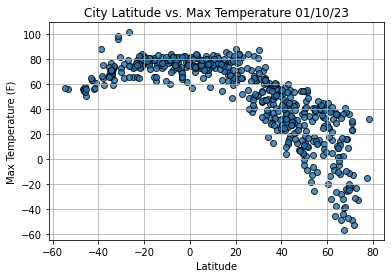

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

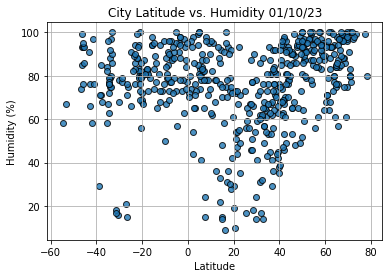

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

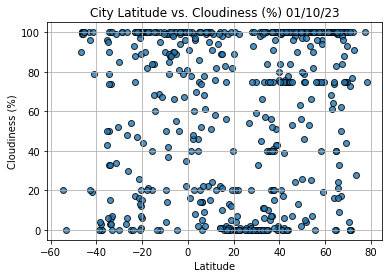

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

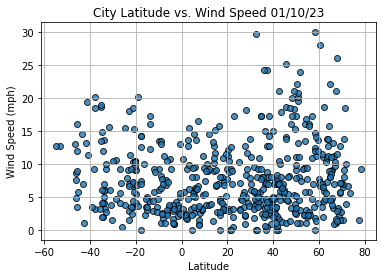

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [25]:
index13 = city_data_df.loc[13]
index13

City                       Marawi
Country                        PH
Date          2023-01-10 22:04:29
Lat                        7.9986
Lng                      124.2928
Max Temp                    67.95
Humidity                       98
Cloudiness                    100
Wind Speed                   2.55
Name: 13, dtype: object

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nalvo,PH,2023-01-10 22:04:24,16.8096,120.5108,66.92,75,56,4.65
2,Barrow,US,2023-01-10 22:04:25,71.2906,-156.7887,-12.98,77,0,18.41
4,Sonoita,MX,2023-01-10 22:04:25,31.8500,-112.8333,70.23,17,45,9.53
6,Saint-Louis,SN,2023-01-10 22:04:26,16.3333,-15.0000,77.09,9,83,15.75
7,Vilyuysk,RU,2023-01-10 22:04:27,63.7553,121.6247,-37.70,94,74,7.29


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


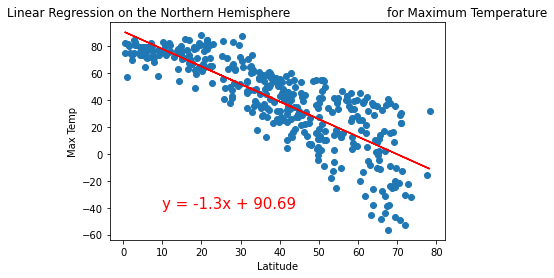

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))


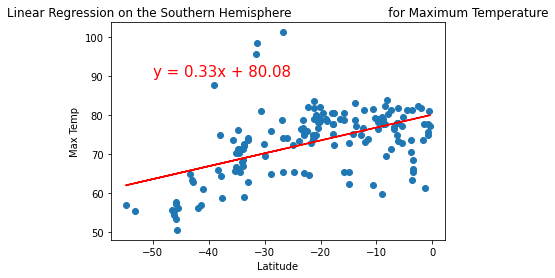

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


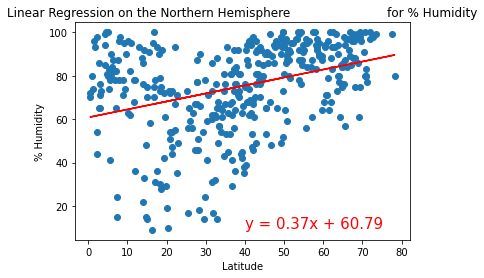

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

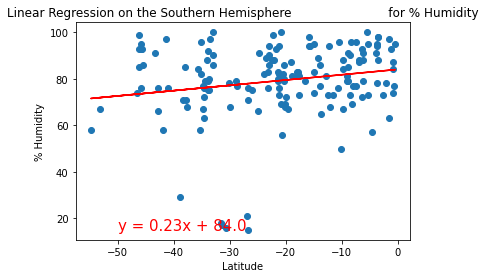

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

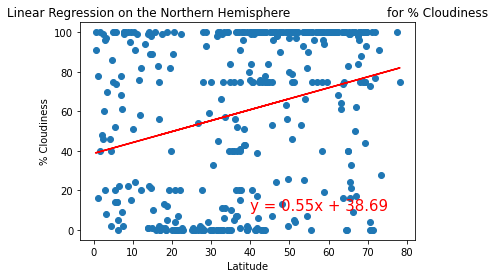

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

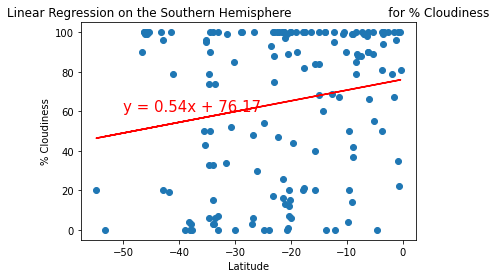

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

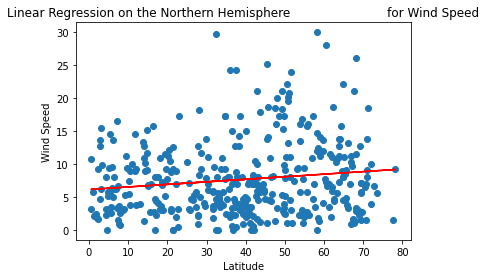

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

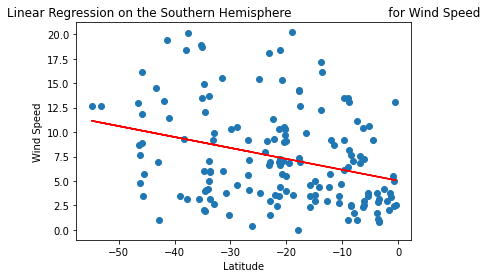

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))